In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

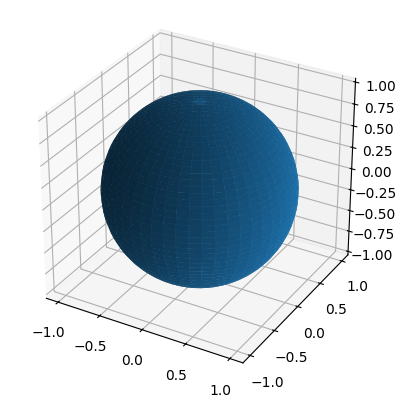

In [87]:
s = np.linspace(0, 2 * np.pi, 50)
t = np.linspace(0, np.pi, 50) 
S, T = np.meshgrid(s, t)

X = np.cos(S) * np.sin(T)
Y = np.sin(S) * np.sin(T)
Z = np.cos(T)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(X, Y, Z)

ax.set_aspect('equal')

plt.show()

[[ 612.  612.  612. ... -612. -612. -612.]
 [ 510.  510.  510. ... -510. -510. -510.]
 [ 402.  402.  402. ... -402. -402. -402.]]


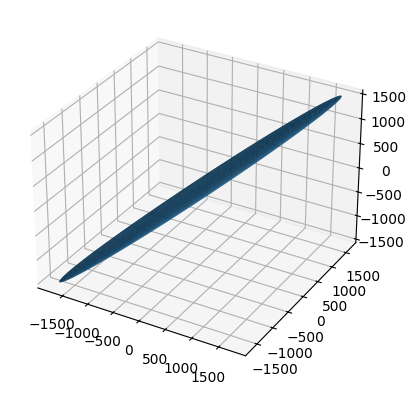

In [88]:
X = (np.cos(S) * np.sin(T)).reshape(-1)
Y = (np.sin(S) * np.sin(T)).reshape(-1)
Z = (np.cos(T)).reshape(-1)

A = np.random.randint(10, size=(3,3)) @ np.random.randint(10, size=(3,3)) @ np.random.randint(10, size=(3,3)) @ [X,Y,Z]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
print(A)
plt.axis('equal')

ax.plot_surface(A[0].reshape(50, 50), A[1].reshape(50, 50),A[2].reshape(50, 50))

plt.show()

[13.76548219  7.7396906   3.40715269]


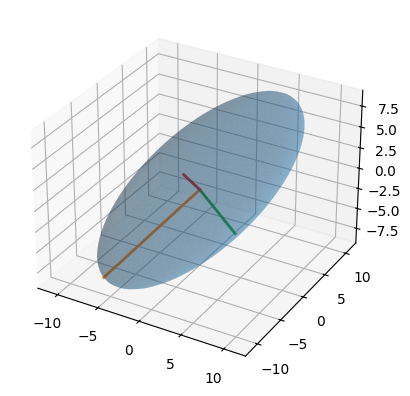

[14.95967781  4.71221152  4.00038778]


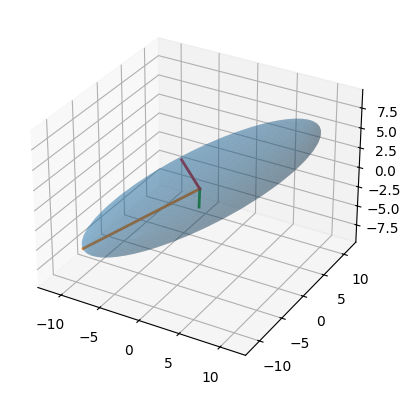

[13.92145161  5.92921681  0.19383765]


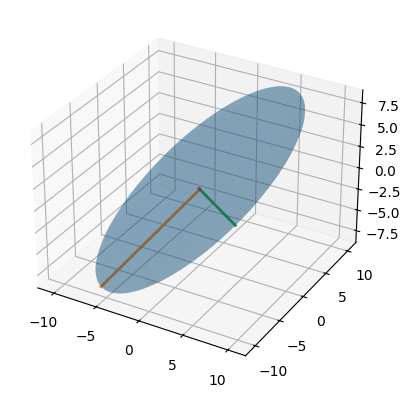

In [90]:
def svd(A):
    U, Sigma, _ = np.linalg.svd(A)
    print(Sigma)

    x = np.outer(np.cos(s), np.sin(t))
    y = np.outer(np.sin(s), np.sin(t))
    z = np.outer(np.ones_like(s), np.cos(t))
    
    ellipsoid_x, ellipsoid_y, ellipsoid_z = A @ np.array([x.flatten(), y.flatten(), z.flatten()])
    ellipsoid_x = ellipsoid_x.reshape(x.shape)
    ellipsoid_y = ellipsoid_y.reshape(y.shape)
    ellipsoid_z = ellipsoid_z.reshape(z.shape)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(ellipsoid_x, ellipsoid_y, ellipsoid_z, alpha=0.3)
    
    origin = np.zeros(3)
    for i in range(3):
        semi_axis = Sigma[i] * U[:, i]  # wektor osi głównej 
        ax.plot([origin[0], semi_axis[0]], [origin[1], semi_axis[1]], [origin[2], semi_axis[2]], linewidth=2, zorder=2)
    plt.axis('equal')
    plt.show()

svd(np.random.randint(10, size=(3,3)))
svd(np.random.randint(10, size=(3,3)))
svd(np.random.randint(10, size=(3,3)))

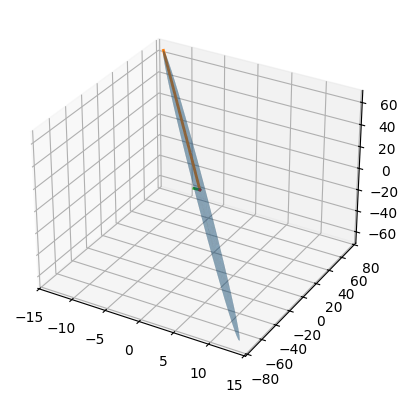

In [ ]:
singular_values = np.array([100, 1,0.01])
    
U, _ = np.linalg.qr(np.random.randn(3, 3)) # rozkald qr zostawiamt tylko zostawiamy ortogonalna
V, _ = np.linalg.qr(np.random.randn(3, 3))
B = U @ np.diag(singular_values) @ V.T 

svd(B)

[[-0.62988518  0.02082883 -0.77640893]
 [-0.68833383 -0.47802612  0.54560752]
 [-0.35977938  0.87809862  0.31543876]] [1291.16576313  485.69398199   99.90159151] [[-0.56666019 -0.5292922  -0.63146337]
 [ 0.79463625 -0.55367124 -0.24900077]
 [ 0.21782894  0.64288251 -0.73433822]]


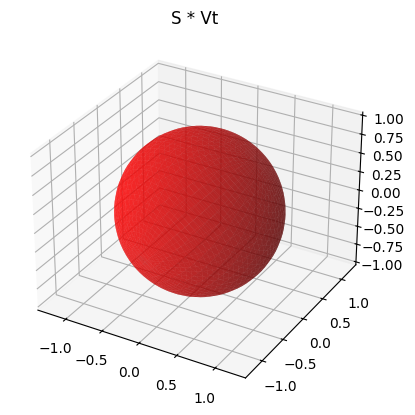

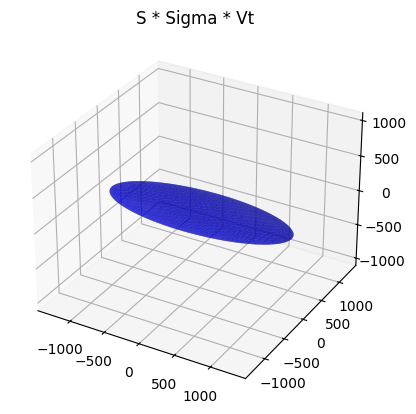

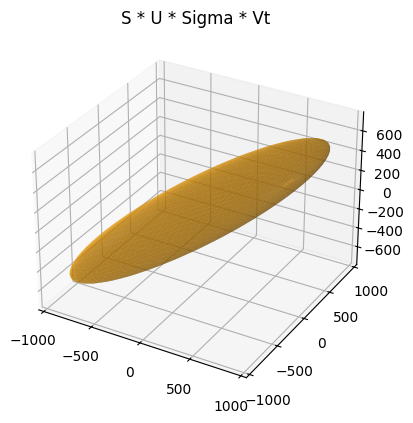

In [85]:
def vis(A):
    
    U, Sigma, Vt = np.linalg.svd(A)
    print(U,Sigma,Vt)
    sphere_points = np.array((X.flatten(), Y.flatten(), Z.flatten()))
    
    #  Vt
    P1 = Vt @ sphere_points
    P1 = P1.reshape(3, 50, 50)
    
    # Sigma
    P2 = np.diag(Sigma) @ P1.reshape(3, -1)
    P2 = P2.reshape(3, 50, 50)
    
    #  U
    P3 = U @ P2.reshape(3, -1)
    P3 = P3.reshape(3, 50, 50)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(P1[0], P1[1], P1[2], color='red', alpha=0.6)
    ax.set_title("S * Vt")
    plt.axis('equal')
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(P2[0], P2[1], P2[2], color='blue', alpha=0.6)
    ax.set_title("S * Sigma * Vt")
    plt.axis('equal')
    plt.show()
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(P3[0], P3[1], P3[2], color='orange', alpha=0.6)
    ax.set_title("S * U * Sigma * Vt")
    plt.axis('equal')
    plt.show()


C = np.random.randint(1000, size=(3,3))
vis(C)


# Task 2

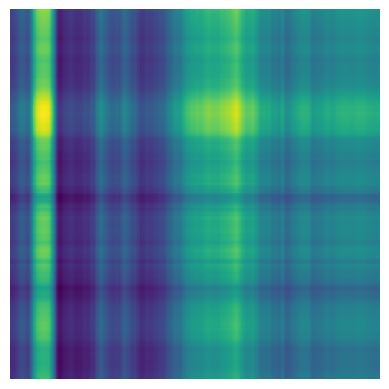

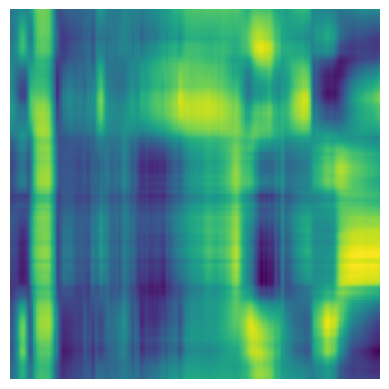

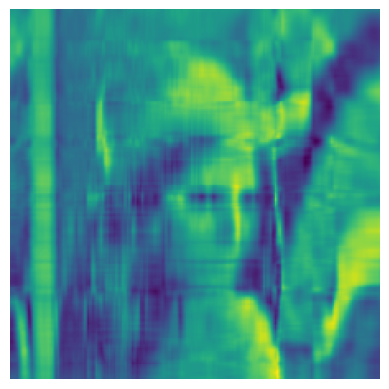

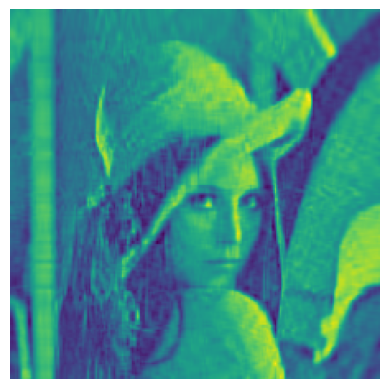

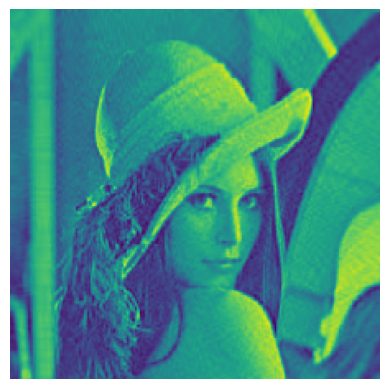

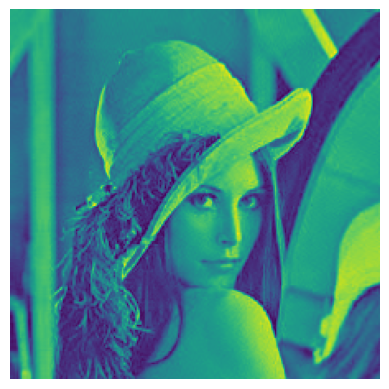

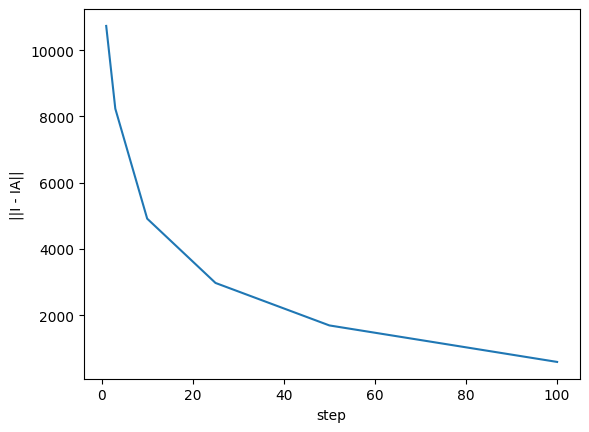

In [3]:
I = np.asarray(Image.open("lenna_image.jpg").convert("L"))
U, S, Vt = np.linalg.svd(I, full_matrices=False)

steps = [1, 3, 10, 25, 50, 100]

vals = []

for step in steps:
    IA = S[:step] * U[:, :step] @ Vt[:step, :]
    vals.append(np.linalg.norm(I - IA))

    plt.imshow(IA)
    plt.axis('off')
    plt.show()

plt.plot(steps,vals)
plt.xlabel('step')
plt.ylabel('||I - IA||')
plt.show()